**ECE1513 - Final Project**\
Melissa Wing Yee Wong, 997432568


In [2]:
import numpy as np
import pandas as pd

# Load heart disease data set
df = pd.read_csv('heart_2022_no_nans.csv')

In [3]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [9]:
# Set "Had heart attack" as the target variable
index = df.columns.get_loc('HadHeartAttack')
y = df.iloc[:,index].values

In [13]:
df.shape

(246022, 40)

In [112]:
# Set input variables X to be all other columns
X = df.iloc[:,list(range(0,index))+list(range(index+1,40))].values

In [64]:
# Look at unique values for different input variables
print(f"Last checkup: {df['LastCheckupTime'].unique()}")
print(f"# of Teeth Removed: {df['RemovedTeeth'].unique()}")
print(f"Health: {df['GeneralHealth'].unique()}")
print(f"Tetanus Vaccine: {df['TetanusLast10Tdap'].unique()}")

Last checkup: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
# of Teeth Removed: ['None of them' '6 or more, but not all' '1 to 5' 'All']
Health: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Tetanus Vaccine: ['Yes, received Tdap' 'Yes, received tetanus shot but not sure what type'
 'No, did not receive any tetanus shot in the past 10 years'
 'Yes, received tetanus shot, but not Tdap']


In [31]:
# Explore data
import matplotlib.pyplot as plt

df["HadHeartAttack"].value_counts()

No     232587
Yes     13435
Name: HadHeartAttack, dtype: int64

This shows that the data set is unbalanced and will need to be balanced prior to training

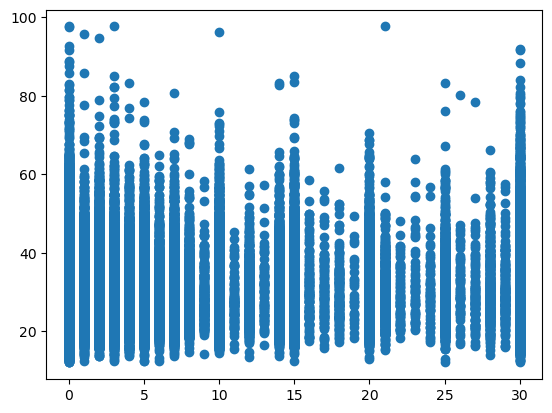

In [37]:
# Visualize the data
plt.scatter(df["PhysicalHealthDays"],df["BMI"])

In [39]:
#####################
# Data Preprocessing
#####################

# Encode target variable

y[y=='Yes']=1
y[y=='No']=0

In [113]:
# Encode yes/no categories to 1 and 0 respectively
X[X=='Yes']=1
X[X=='No']=0

In [115]:
# Remove states from dataset
X=X[:,1:]

In [117]:
# Encode gender with Female = 1, Male = 0
X[X=='Female']=1
X[X=='Male']=0
X

array([[1, 'Very good', 4.0, ..., 'Yes, received Tdap', 0, 0],
       [0, 'Very good', 0.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 0],
       [0, 'Very good', 0.0, ...,
        'No, did not receive any tetanus shot in the past 10 years', 0,
        1],
       ...,
       [0, 'Good', 0.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 1],
       [1, 'Excellent', 2.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 0],
       [0, 'Very good', 0.0, ...,
        'No, did not receive any tetanus shot in the past 10 years', 0,
        1]], dtype=object)

In [118]:
# Encode general health with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Gen health is now columns [0-4]

In [122]:
# Encode last checkup with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Checkup = columns [0-3], Gen health = columns [4-8]

In [124]:
# Encode "removedteeth" with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[14])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Teeth = cols [0-3],Checkup = columns [4-7], Gen health = columns [8-12]
X

array([[0.0, 0.0, 0.0, ..., 'Yes, received Tdap', 0, 0],
       [0.0, 0.0, 0.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 0],
       [0.0, 1.0, 0.0, ...,
        'No, did not receive any tetanus shot in the past 10 years', 0,
        1],
       ...,
       [1.0, 0.0, 0.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 1],
       [0.0, 0.0, 0.0, ...,
        'Yes, received tetanus shot but not sure what type', 0, 0],
       [0.0, 0.0, 0.0, ...,
        'No, did not receive any tetanus shot in the past 10 years', 0,
        1]], dtype=object)

In [127]:
# Encode smoker status with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[33])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # smoker= cols [0-3],Teeth = cols [4-7],Checkup = columns [8-11], Gen health = columns [12-16]

In [129]:
# Encode ecigarette status with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[37])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 
# E-cig = cols [0-3], smoker= cols [4-7],Teeth = cols [8-11],Checkup = columns [12-15], Gen health = columns [16-20]

In [131]:
# Encode ethnicity with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[42])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 
# Ethnicity = cols[0-4],E-cig = cols [5-8], smoker= cols [9-12],Teeth = cols [13-16],
# Checkup = columns [17-20], Gen health = columns [20-24]

In [134]:
# Encode age with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[47])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 
# Age= cols [0-12], Ethnicity = cols[13-17],E-cig = cols [18-21], smoker= cols [22-25],Teeth = cols [26-29],
# Checkup = columns [30-33], Gen health = columns [34-38]

In [139]:
# Encode age with one hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[67])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 
# Tet = cols [0,3], Age= cols [4-16], Ethnicity = cols[17-21],E-cig = cols [22-25], smoker= cols [26-29],Teeth = cols [30-33],
# Checkup = columns [34-37], Gen health = columns [38-42]

In [153]:
# Cleanup some outlier data
X[X=='Yes, but only during pregnancy (female)']=1
X[X=='No, pre-diabetes or borderline diabetes']=0
X[X=='Tested positive using home test without a health professional']=1

In [154]:
# Split dataset into 80% training and 20% test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [155]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
# Balance the training set by downsampling the data points corresponding to "No heart attack"

# Combine the X and y training set
train_set = np.column_stack((X_train,y_train))

In [157]:
# Arrays to store data for respondents with and without heart attacks
heart_attack = []
no_heart_attack = []

In [158]:
# Find corresponding data observations for heart attack and no heart attack patients
for i in range(0,train_set.shape[0]):
    if train_set[i][-1] == 0:
        no_heart_attack.append(train_set[i])
    else:
        heart_attack.append(train_set[i])


In [160]:
heart_attack = np.array(heart_attack)
no_heart_attack = np.array(no_heart_attack)

In [161]:
# Downsample the no heart attack observations

from sklearn.utils import resample
no_heart_down = resample(no_heart_attack,replace=False,n_samples=heart_attack.shape[0], random_state=42)

In [162]:
# Add downsampled data back into the training set
train_set_down = np.concatenate((heart_attack,no_heart_down),axis=0)

In [163]:
train_set_down.shape

(21606, 74)

In [164]:
# Separate the downsampled X and y variables
X_train_down = train_set_down[:,:-1]
y_train_down = train_set_down[:,-1]
X_train_down.shape

(21606, 73)

In [173]:
y_train_down=y_train_down.astype('int')


In [181]:
y_test=y_test.astype('int')

In [182]:
# Train KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def select_knn_model(k):
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_clf.fit(X_train_down,y_train_down)

    #Evaluate on training and test set
    knn_pred_test = knn_clf.predict(X_test)
    knn_pred_train = knn_clf.predict(X_train_down)

    #Evaluate accuracy
    knn_train_accuracy = accuracy_score(y_train_down,knn_pred_train)
    knn_test_accuracy = accuracy_score(y_test,knn_pred_test)

    return [knn_train_accuracy,knn_test_accuracy]

In [183]:
# Matrix to store accuracy scores over different K values
acc_matrix=[]

In [184]:
# Loop KNN model over k of 1 to 20
for i in range(1,21):
    acc_i = select_knn_model(i)
    acc_matrix.append(acc_i)

Text(0.5, 1.0, 'KNN Accuracy')

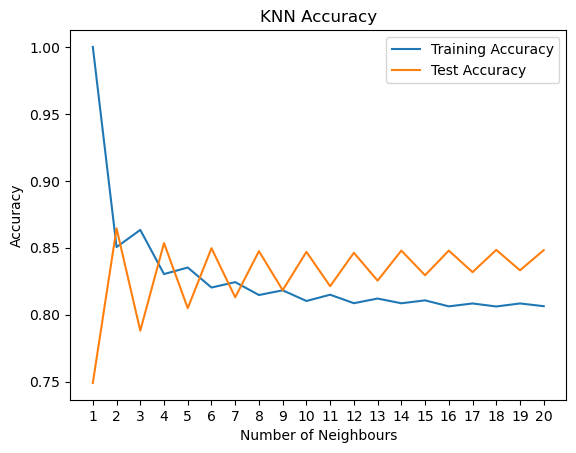

In [185]:
import matplotlib.pyplot as plt

# Plot accuracy vs number of K neighbours
plt.plot(range(1,21),[row[0] for row in acc_matrix],label='Training Accuracy')
plt.plot(range(1,21),[row[1] for row in acc_matrix],label='Test Accuracy')
plt.legend()
plt.xticks(range(1,21))
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')

From the graph above, a K value of 15 is deemed to be optimal.

In [193]:
print(f"KNN accuracy on training set: {acc_matrix[14][0]}")
print(f"KNN accuracy on test set: {acc_matrix[14][1]}")

KNN accuracy on training set: 0.8107007312783486
KNN accuracy on test set: 0.8294482268062189


In [189]:
# Re-calculate KNN with final optimal K of 15
knn_clf = KNeighborsClassifier(n_neighbors=15, p=2)
knn_clf.fit(X_train_down,y_train_down)

KNeighborsClassifier(n_neighbors=15)

In [190]:
# Try out SVM
from sklearn.svm import SVC
svm_clf = SVC(kernel='sigmoid',random_state = 42)
svm_clf.fit(X_train_down,y_train_down)

SVC(kernel='sigmoid', random_state=42)

In [191]:
#Evaluate on training and test set
svm_pred_test = svm_clf.predict(X_test)
svm_pred_train = svm_clf.predict(X_train_down)

#Evaluate accuracy
svm_train_accuracy = accuracy_score(y_train_down,svm_pred_train)
svm_test_accuracy = accuracy_score(y_test,svm_pred_test)

In [192]:
print(f"SVM accuracy on the training set: {svm_train_accuracy}")
print(f"SVM accuracy on the test set: {svm_test_accuracy}")
    

SVM accuracy on the training set: 0.7434046098306026
SVM accuracy on the test set: 0.7473021034447719


In [194]:
# Try out decision tree
from  sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train_down, y_train_down)

DecisionTreeClassifier(random_state=42)

In [195]:
#Evaluate on training and test set
dtc_pred_test = dtc_clf.predict(X_test)
dtc_pred_train = dtc_clf.predict(X_train_down)

#Evaluate accuracy
dtc_train_accuracy = accuracy_score(y_train_down,dtc_pred_train)
dtc_test_accuracy = accuracy_score(y_test,dtc_pred_test)

In [196]:
print(f"Decision tree accuracy on the training set: {dtc_train_accuracy}")
print(f"Decision tree accuracy on the test set: {dtc_test_accuracy}")

Decision tree accuracy on the training set: 1.0
Decision tree accuracy on the test set: 0.7179148460522304


In [197]:
# Try linear discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train_down,y_train_down)

LinearDiscriminantAnalysis()

In [198]:
#Evaluate on training and test set
lda_pred_test = lda_clf.predict(X_test)
lda_pred_train = lda_clf.predict(X_train_down)

#Evaluate accuracy
lda_train_accuracy = accuracy_score(y_train_down,lda_pred_train)
lda_test_accuracy = accuracy_score(y_test,lda_pred_test)

In [199]:
print(f"Linear discriminant accuracy on the training set: {lda_train_accuracy}")
print(f"Linear discriminant accuracy on the test set: {lda_test_accuracy}")

Linear discriminant accuracy on the training set: 0.804545033786911
Linear discriminant accuracy on the test set: 0.841215323645971


From the different models above, we can see the KNN and LDA models performed best.

In [203]:
# Find most important features
from sklearn.inspection import permutation_importance

# Array containing model classifiers
clfs = [knn_clf,svm_clf, dtc_clf, lda_clf]

# Array to hold feature indices
feature_index = []

In [204]:
import heapq

In [205]:
# Function to determine 5 most important features of each model

def get_feature_importance(clf):
    importance_train = list(permutation_importance(clf,X_train_down,y_train_down,random_state=0).importances_mean)
    train_index = heapq.nlargest(5,range(len(importance_train)),key=importance_train.__getitem__)
    feature_index.extend([train_index])

In [206]:
# Determine the important features for every model classifier
for clf in clfs:
    get_feature_importance(clf)

In [207]:
feature_index

[[48, 49, 63, 39, 32],
 [48, 49, 41, 61, 62],
 [48, 63, 33, 56, 43],
 [48, 43, 63, 16, 49]]

In [289]:
# determine associated features

columns = []
df_columns = df.columns
df_columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [290]:
# Fill in encoded columns first
columns.extend(df_columns[37] for i in range(0,4))
columns.extend(df_columns[29] for i in range(4,17))
columns.extend(df_columns[28] for i in range(17,22))
columns.extend(df_columns[26] for i in range(22,26))
columns.extend(df_columns[25] for i in range(26,30))
columns.extend(df_columns[8] for i in range(30,34))
columns.extend(df_columns[5] for i in range(34,38))
columns.extend(df_columns[2] for i in range(38,43))

In [291]:
# Add feature names to each column
cols_to_ignore = [2,5,8,9,25,26,28,29,37] # Cols that were already added as they were one hot encoded

for df_i in range(1,len(df_columns)):
    if not cols_to_ignore:
        columns.append(df_columns[df_i])
        
    elif df_i==cols_to_ignore[0]:
        cols_to_ignore.pop(0)
    else:
        columns.append(df_columns[df_i])

In [296]:
features=[]

In [301]:
# Find the associated feature with the feature index
for i in range(len(feature_index)):
    for j in range(len(feature_index[0])):
        features.append(columns[feature_index[i][j]])

In [303]:
features=np.reshape(features,(4,5))

In [306]:
# Print out most important features for each model
print(f"KNN Model Features: {features[0]}")
print(f"SVM Model Features: {features[1]}")
print(f"DTC Model Features: {features[2]}")
print(f"LDA Model Features: {features[3]}")

KNN Model Features: ['HadAngina' 'HadStroke' 'ChestScan' 'GeneralHealth' 'RemovedTeeth']
SVM Model Features: ['HadAngina' 'HadStroke' 'GeneralHealth' 'DifficultyDressingBathing'
 'DifficultyErrands']
DTC Model Features: ['HadAngina' 'ChestScan' 'RemovedTeeth' 'HadDiabetes' 'Sex']
LDA Model Features: ['HadAngina' 'Sex' 'ChestScan' 'AgeCategory' 'HadStroke']
